# 3 Linear regression

Important questions to think while investigating data:
1. Is there a relationship between advertising budget and sales? Our first goal should be to determine whether the data provide evidence of an association between advertising expenditure and sales. If the evidence is weak, then one might argue that no money should be spent on advertising!

2. How strong is the relationship between advertising budget and sales? Assuming that there is a relationship between advertising and sales, we would like to know the strength of this relationship. In other words, given a certain advertising budget, can we predict sales with a high level of accuracy? This would be a strong relationship. Or is a prediction of sales based on advertising expenditure only slightly better than a random guess? This would be a weak relationship. 

3. Which media contribute to sales? Do all three media—TV, radio, and newspaper—contribute to sales, or do just one or two of the media contribute? To answer this question, we must find a way to separate out the individual effects of each medium when we have spent money on all three media. 

4. How accurately can we estimate the effect of each medium on sales? For every dollar spent on advertising in a particular medium, by what amount will sales increase? How accurately can we predict this amount of increase?

5. How accurately can we predict future sales? For any given level of television, radio, or newspaper advertising, what is our prediction for sales, and what is the accuracy of this prediction?


6. Is the relationship linear?If there is approximately a straight-line relationship between advertising expenditure in the various media and sales, then linear regression is an appropriate tool. If not, then it may still be possible to transform the predictor or the response so that linear regression can be used.

7. Is there synergy among the advertising media? Perhaps spending $50,000 on television advertising and $50,000 on radio advertising results in more sales than allocating $100,000 to
either television or radio individually. In marketing, this is known as a synergy effect, while in statistics it is called an interaction effect.

In [222]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#plt.style.use('seaborn-white')
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_ad = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv", header=0, names=['id', 'TV', 'radio', 'newspaper', 'sales'])
df_ad.head()

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


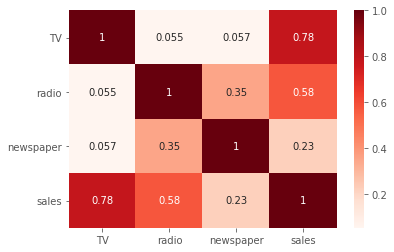

In [231]:
cor = df_ad.drop("id", axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

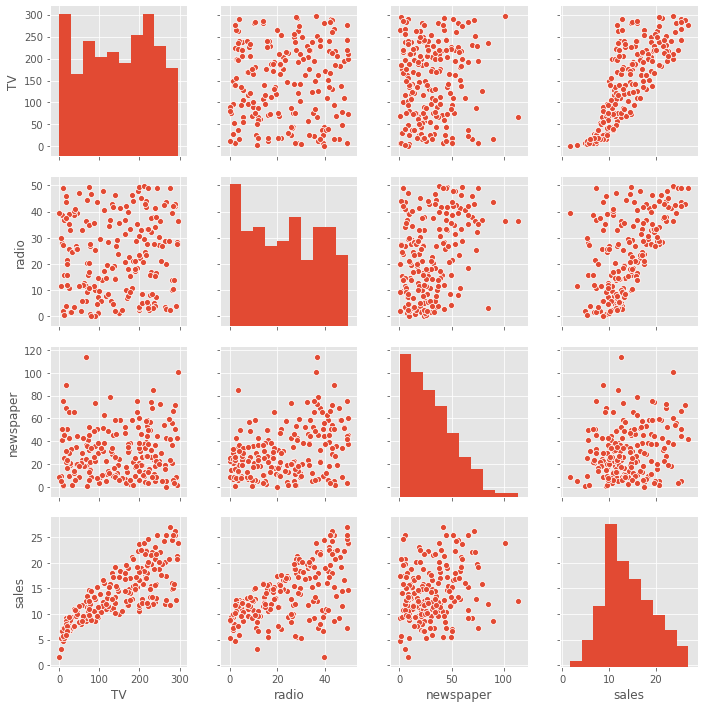

In [4]:
sns.pairplot(df_ad.drop("id", axis=1))

### Simple linear regression

$ Y \approx \beta_0 + \beta_1X $

where $\beta_0$ and $\beta_1$ are known as intercept and slope, respectively. As know as, coefficient parameters.

Residual:

$e_i = y_i − ŷ_i$ represents the ith residual

We define the residual sum of squares (RSS) as

$RSS =e^2_1 + e^2_2 + ··· + e^2_n $

The least squares approach chooses $\beta_0$ and $\beta_1$ to minimize the RSS

Text(0, 0.5, 'Sales')

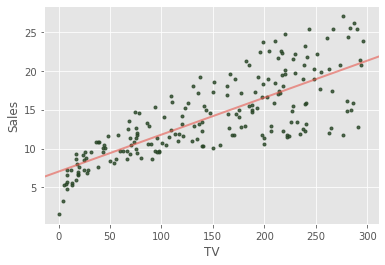

In [41]:
_ = sns.regplot(x="TV", y="sales", data=df_ad,ci=False, 
               scatter_kws={"s":9,"color":"#284526"},
                line_kws={"lw":2,"color":"#E7584D99"})
plt.ylabel("Sales")

### Generating fitted lines
With random numbers we can see the true line and estimated line by OLS.

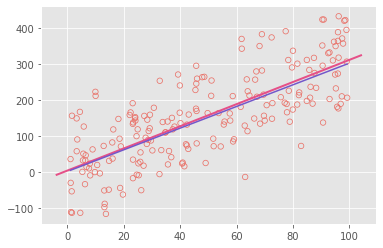

In [112]:
np.random.seed(0)
e = np.random.normal(0,80,200)
X = np.random.random_sample(200)*100
Y = (2+(3*X))

sns.scatterplot(X,Y + e, s=30,edgecolor="#E9716880", facecolors='none')
sns.regplot(X,Y + e, scatter_kws={"s":0},ci=False, line_kws={"lw":2,"color":"#E55088"})
sns.lineplot(X,Y, color="#7357CA")

### Estimating of parameters $\beta_0$ and $\beta_1$ is analogue to estimating population mean from samples

In [191]:
np.random.seed(0)
size = 200 
u = np.random.random_sample(size)*100
mean = round(np.mean(u),2)
u_means = []
ses = []
for i in range(0,20):
    np.random.seed(np.random.randint(0,100,1))
    u_ = [u[index] for index in np.random.randint(0,size-1,20)]
    u_means.append(np.mean(u_))
    ses.append(sem(u_))
np.mean(u_means),mean,np.mean(ses) 

(49.76903905099003, 50.04, 6.072650366943561)

## Fitting linear models to assess the effect of TV media investiment on Sales

Coefficients:  0.04753664043301975
Intercept:  7.032593549127695
0.0475366404330197 7.032593549127702 0.6118750508500707 1.4673897001948012e-42 0.0026906071877968703


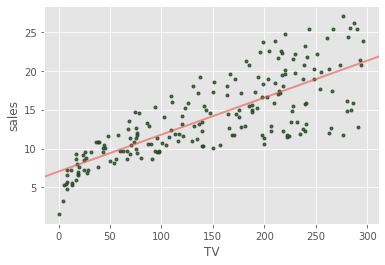

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(df_ad.TV.to_numpy().reshape(-1, 1),df_ad.sales.to_numpy())
print('Coefficients: ', model.coef_[0])
print("Intercept: ",model.intercept_)

_ = sns.regplot(x="TV", y="sales", data=df_ad,ci=False, 
               scatter_kws={"s":9,"color":"#284526"},
                line_kws={"lw":2,"color":"#E7584D99"})

slope, intercept, r_value, p_value, std_err = stats.(df_ad.TV.to_numpy(),df_ad.sales.to_numpy())
print(slope, intercept, r_value**2, p_value, std_err)

In [226]:
lm = sm.OLS.from_formula('sales ~ TV', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        00:01:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiples linear regression

In [228]:
lm = sm.OLS.from_formula('sales ~ newspaper', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00115
Time:                        00:08:57   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
lm = sm.OLS.from_formula('sales ~ radio', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.35e-19
Time:                        00:09:09   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
lm = sm.OLS.from_formula('sales ~ radio+TV+newspaper', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        00:14:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
lm = sm.OLS.from_formula('sales ~ radio+TV', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.83e-98
Time:                        00:48:31   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$RSS = \sum\limits_{j=1}^n (y_i - \hat y_i)^2 
    = \sum\limits_{j=1}^n (y_i - \hat\beta_0 - \hat\beta_1 {x_i}_1 - \hat\beta_2 {x_i}_2 - \cdot\cdot\cdot - \hat\beta_p{x_i}_p )^2 $





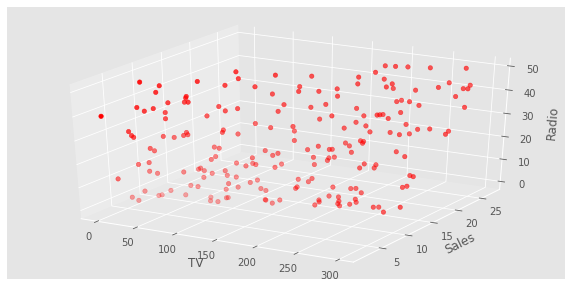

In [242]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ad.TV.to_numpy(), df_ad.sales.to_numpy(), df_ad.radio.to_numpy(), c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_zlabel('Radio')

plt.show()

In [243]:
lm = sm.OLS.from_formula('sales ~ radio+TV + (radio*TV)', df_ad)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          6.68e-146
Time:                        01:16:40   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio:TV       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Non-linear Relationships

In [315]:
df_auto = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.csv")
#df_auto = df_auto.loc[df_auto.horsepower != "?"]
df_auto['horsepower'] = df_auto.horsepower.apply(lambda value : int(value) if value is not "?" else 0)

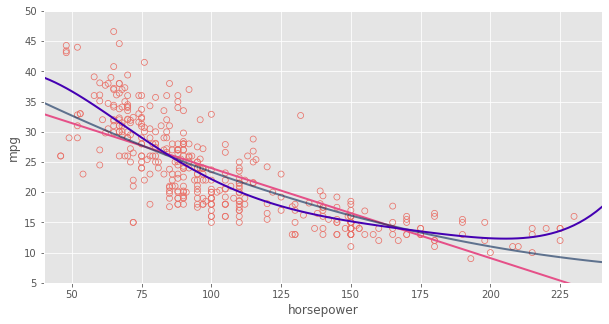

In [316]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(x="horsepower",y="mpg", data=df_auto,edgecolor="#E9716880", facecolors='none')
plt.xlim(40,240)
plt.ylim(5,50)
sns.regplot(x="horsepower",y="mpg", data=df_auto, scatter_kws={"s":0},ci=False, line_kws={"lw":2,"color":"#E55088"})
sns.regplot(x="horsepower",y="mpg", order=2, data=df_auto, scatter_kws={"s":0},ci=False, line_kws={"lw":2,"color":"#05255599"})
sns.regplot(x="horsepower",y="mpg", order=5, data=df_auto, scatter_kws={"s":0},ci=False, line_kws={"lw":2,"color":"#4400B2"})


In [317]:
lm = sm.OLS.from_formula('mpg ~ horsepower + horsepower ^2', df_auto)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     271.5
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           7.49e-75
Time:                        01:44:29   Log-Likelihood:                -1207.6
No. Observations:                 397   AIC:                             2421.
Df Residuals:                     394   BIC:                             2433.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.9151      0.710     54.843      0.000      37.520      40.310
horsepower        -0.0699      0.128     -0.547      0.584      -0.321       0.181
horsepower ^ 2    -0.0793      0.128     -0.619      0.536      -0.331       0.173
==============================================================================
Omnibus:                       13.224   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.489
Skew:                           0.345   Prob(JB):                     0.000433
Kurtosis:                       3.678   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""